In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [9]:
#data = pd.read_excel('orderslist.xlsx')
data = pd.read_excel("orderslist.xlsx", sheet_name="Sheet1", engine='openpyxl')


#print(data.head())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677759 entries, 0 to 677758
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   route               677759 non-null  object        
 1   ship_date           677759 non-null  datetime64[ns]
 2   truck_id            677759 non-null  object        
 3   old_truck_id        461771 non-null  object        
 4   branch              677759 non-null  object        
 5   whse                677759 non-null  object        
 6   ShipFromAddress1    677759 non-null  object        
 7   ShipToName2         677747 non-null  object        
 8   ShipToAddress1      677759 non-null  object        
 9   unique_del_loc      461771 non-null  object        
 10  whse-acct-shipto    677759 non-null  object        
 11  product_id          677759 non-null  object        
 12  product_desc        677750 non-null  object        
 13  uom                 677757 no

In [10]:
print("Data Frame Load.......Start Analysis")

Data Frame Load.......Start Analysis


In [11]:
# Plot the number of unique customers for each warehouse

unique_customers_by_warehouse = data.groupby('whse')['ShipToName2'].nunique()


print("\nUnique Customers by Warehouse:")
print(unique_customers_by_warehouse)


Unique Customers by Warehouse:
whse
A10     139
B10     461
B15    1043
B20     277
B25     226
       ... 
R45    1246
R46    1420
R47    1297
R48     209
V20     799
Name: ShipToName2, Length: 61, dtype: int64


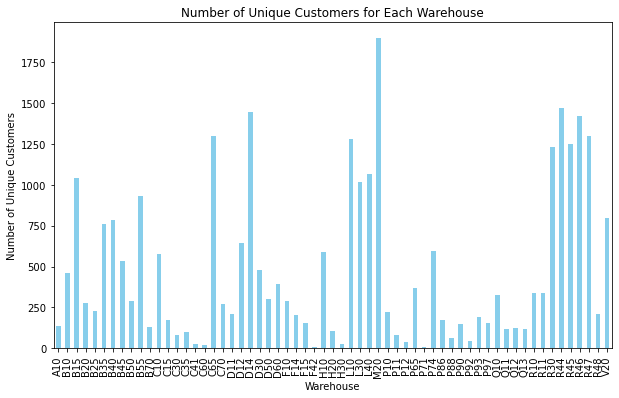

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
unique_customers_by_warehouse.plot(kind='bar', color='skyblue')
plt.xlabel('Warehouse')
plt.ylabel('Number of Unique Customers')
plt.title('Number of Unique Customers for Each Warehouse')
plt.show()

In [47]:
print("Process 1 Completed")

Process 1 Completed


In [48]:
# Group by month and count unique customers

df = data
df['order_date'] = pd.to_datetime(df['ship_date'])

monthly_grouped = df.groupby(df['ship_date'].dt.to_period('M'))['ShipToName2'].nunique()

print(monthly_grouped)

ship_date
2022-03    12454
2022-04    11618
2022-05    14925
2022-06    15803
2022-07    14653
2022-08    12167
Freq: M, Name: ShipToName2, dtype: int64


In [16]:
# Group by month, warehouse, and product_type, then count the number of orders
monthly_warehouse_product_grouped = df.groupby([df['order_date'].dt.to_period('M'), 'whse', 'product_type'])['order_date'].count()

print(monthly_warehouse_product_grouped)

order_date  whse  product_type
2022-03     A10   BULK             117
                  PACKAGE           91
            B10   BULK             347
                  PACKAGE          716
            B15   BULK             814
                                  ... 
2022-08     R11   PACKAGE          381
            R30   BULK             768
                  PACKAGE         5442
            V20   BULK            1473
                  PACKAGE         1709
Name: order_date, Length: 679, dtype: int64


In [49]:
# See how many unique custormers for each warehouse per month
monthly_warehouse_grouped = df.groupby([df['order_date'].dt.to_period('M'), 'whse'])['ShipToName2'].nunique()
print(monthly_warehouse_grouped)

order_date  whse
2022-03     A10      57
            B10     210
            B15     510
            B20      87
            B25      82
                   ... 
2022-08     Q13      66
            R10     124
            R11     148
            R30     618
            V20     478
Name: ShipToName2, Length: 347, dtype: int64


In [50]:
 #see how many unique customers made orders of each product type at each warehouse in each month.

monthly_warehouse_product_grouped_1 = df.groupby([df['order_date'].dt.to_period('M'), 'whse', 'product_type'])['ShipToName2'].nunique()
print(monthly_warehouse_product_grouped_1)

order_date  whse  product_type
2022-03     A10   BULK             23
                  PACKAGE          39
            B10   BULK            109
                  PACKAGE         123
            B15   BULK            292
                                 ... 
2022-08     R11   PACKAGE         103
            R30   BULK            284
                  PACKAGE         469
            V20   BULK            334
                  PACKAGE         285
Name: ShipToName2, Length: 679, dtype: int64


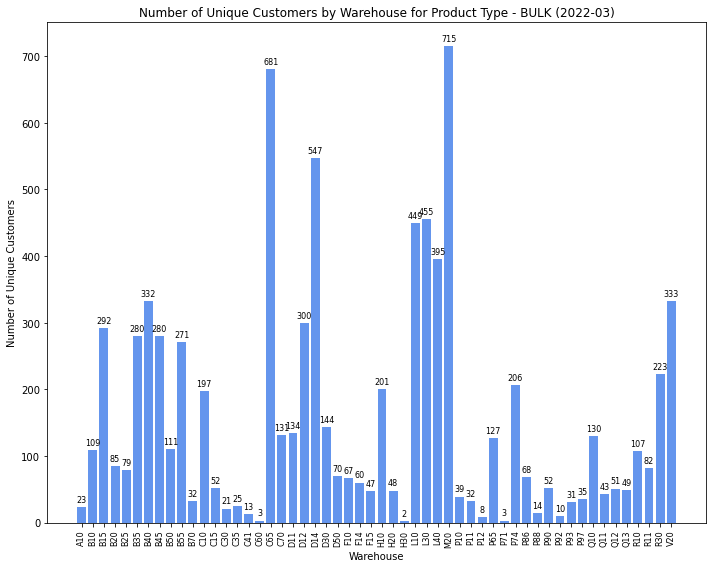

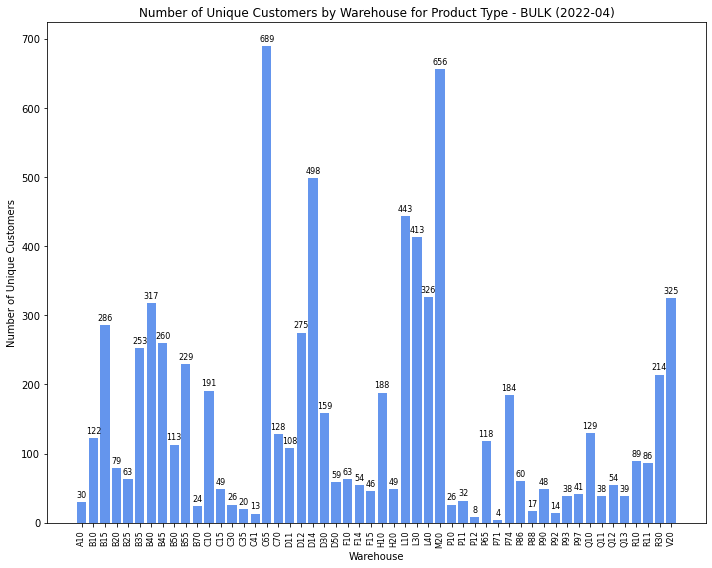

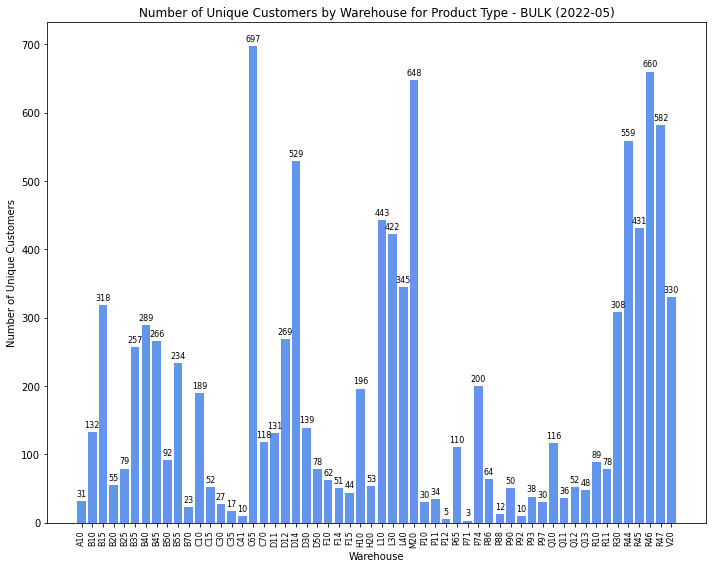

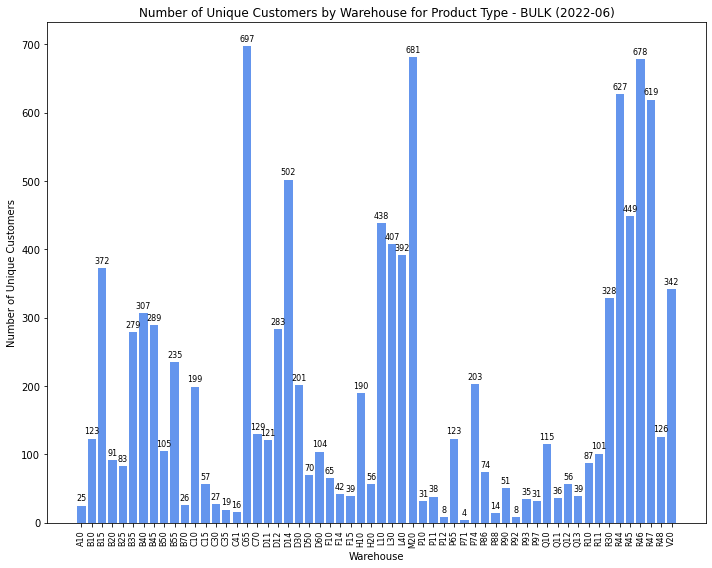

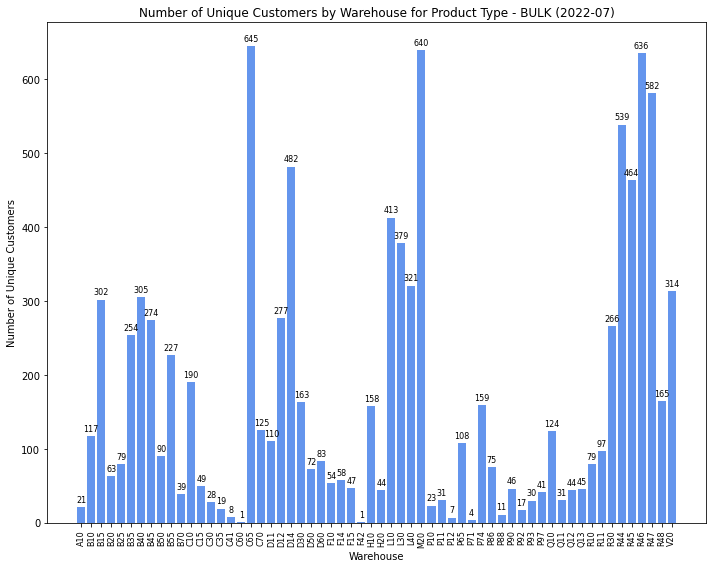

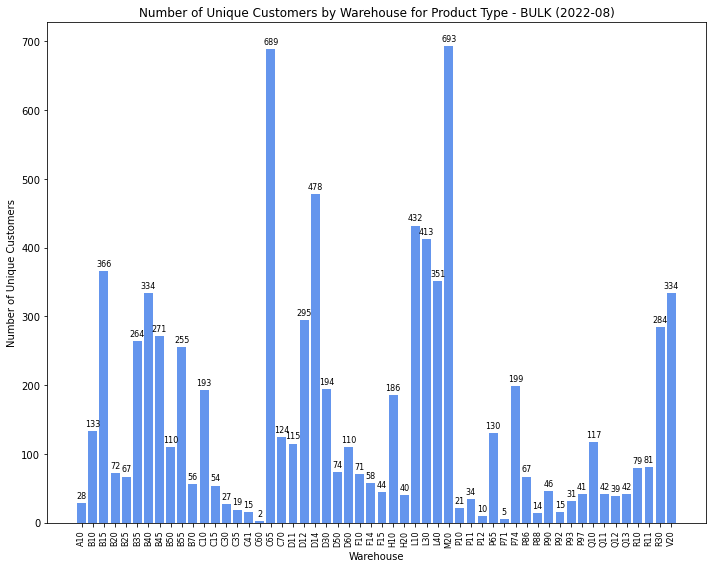

In [53]:
# Group by month, warehouse, and product_type, then count the number of unique customers and plot them for each product type seperately for seperate months


monthly_warehouse_product_grouped_1 = df.groupby([df['order_date'].dt.to_period('M'), 'whse', 'product_type'])['ShipToName2'].nunique()


monthly_warehouse_product_grouped_1 = monthly_warehouse_product_grouped_1.reset_index()


desired_product_type = 'BULK'
filtered_data = monthly_warehouse_product_grouped_1[monthly_warehouse_product_grouped_1['product_type'] == desired_product_type]


unique_months = filtered_data['order_date'].unique()


for month in unique_months:

    month_data = filtered_data[filtered_data['order_date'] == month]

    # Print details of the current month
    #print(f"Details for {month}:")
    #print(month_data)


    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111)

    x_labels = [f"{row['whse']}" for _, row in month_data.iterrows()]
    bars = ax.bar(x_labels, month_data['ShipToName2'], color='cornflowerblue')
    plt.xlabel('Warehouse')
    plt.ylabel('Number of Unique Customers')
    plt.title(f'Number of Unique Customers by Warehouse for Product Type - {desired_product_type} ({month})')
    plt.xticks(rotation=90, fontsize=8, ha='center')
    plt.tight_layout()


    for bar, value in zip(bars, month_data['ShipToName2']):
        height = bar.get_height()
        ax.annotate(str(value), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points",ha='center', va='bottom', fontsize=8)

    plt.show()

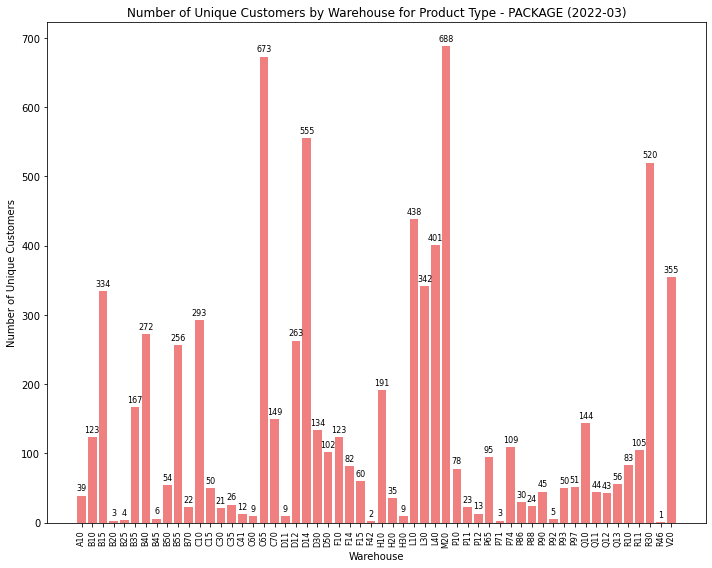

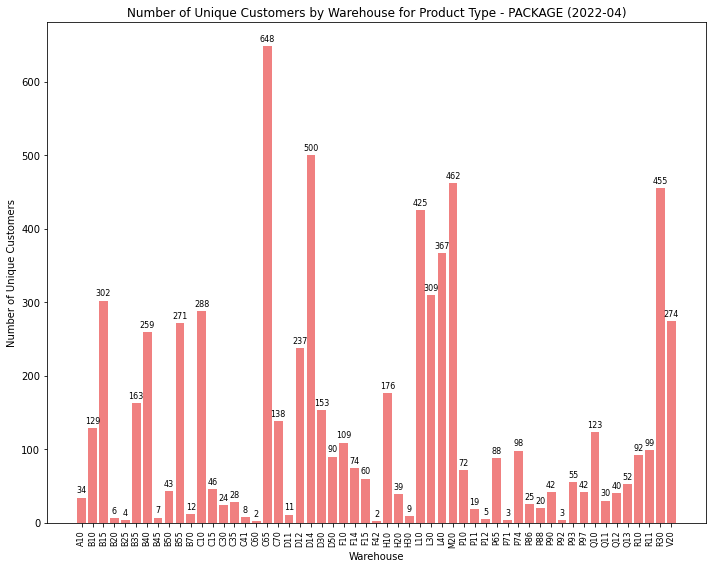

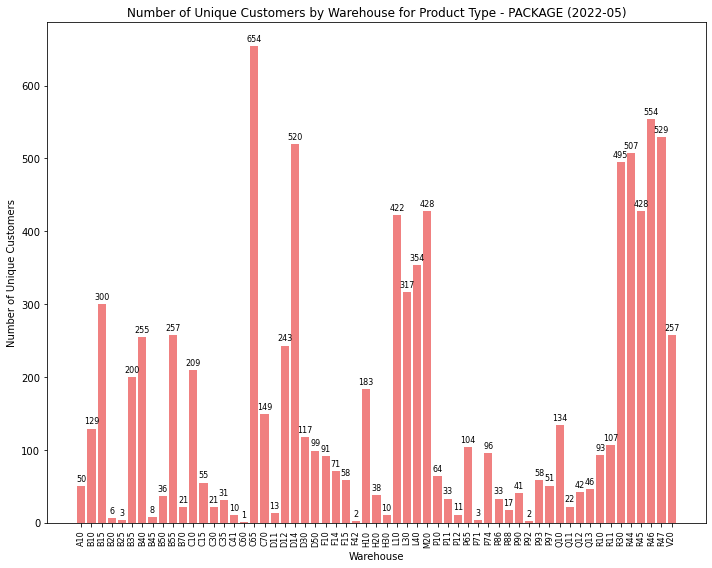

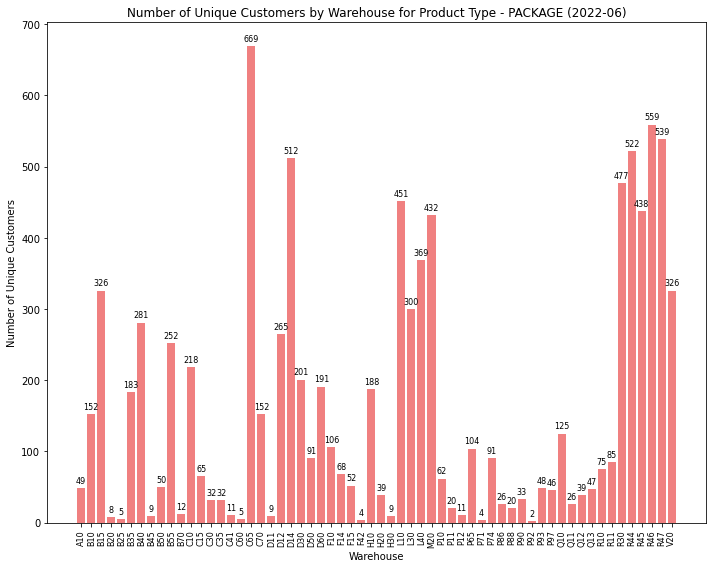

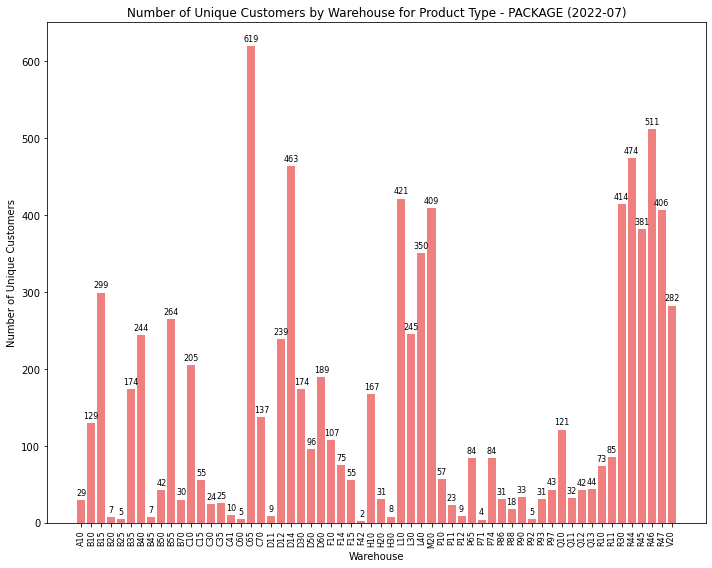

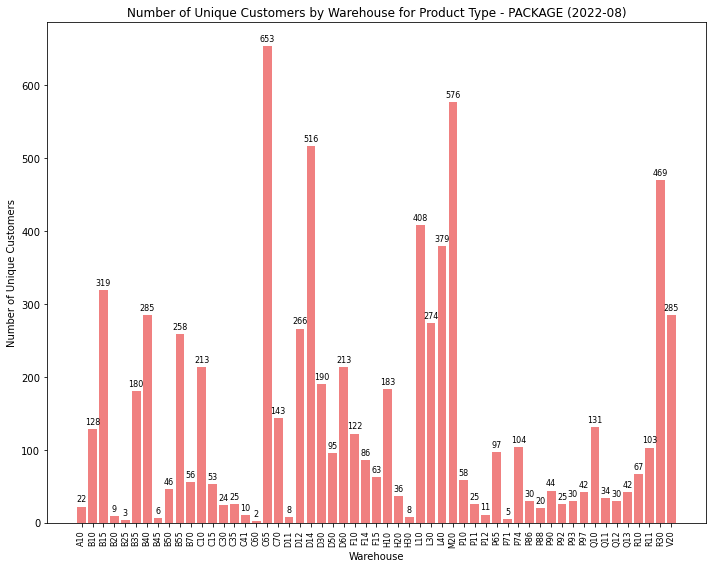

In [55]:

desired_product_type = 'PACKAGE'
filtered_data = monthly_warehouse_product_grouped_1[monthly_warehouse_product_grouped_1['product_type'] == desired_product_type]


unique_months = filtered_data['order_date'].unique()


for month in unique_months:

    month_data = filtered_data[filtered_data['order_date'] == month]

    # Print details of the current month
    #print(f"Details for {month}:")
    #print(month_data)


    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111)

    x_labels = [f"{row['whse']}" for _, row in month_data.iterrows()]
    bars = ax.bar(x_labels, month_data['ShipToName2'], color='lightcoral')
    plt.xlabel('Warehouse')
    plt.ylabel('Number of Unique Customers')
    plt.title(f'Number of Unique Customers by Warehouse for Product Type - {desired_product_type} ({month})')
    plt.xticks(rotation=90, fontsize=8, ha='center')
    plt.tight_layout()


    for bar, value in zip(bars, month_data['ShipToName2']):
        height = bar.get_height()
        ax.annotate(str(value), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points",ha='center', va='bottom', fontsize=8)

    plt.show()

Top 20 warehouses for 2022-03:
    order_date whse product_type  ShipToName2
67     2022-03  M20         BULK          715
68     2022-03  M20      PACKAGE          688
34     2022-03  C65         BULK          681
35     2022-03  C65      PACKAGE          673
43     2022-03  D14      PACKAGE          555
42     2022-03  D14         BULK          547
106    2022-03  R30      PACKAGE          520
63     2022-03  L30         BULK          455
61     2022-03  L10         BULK          449
62     2022-03  L10      PACKAGE          438
66     2022-03  L40      PACKAGE          401
65     2022-03  L40         BULK          395
109    2022-03  V20      PACKAGE          355
64     2022-03  L30      PACKAGE          342
5      2022-03  B15      PACKAGE          334
108    2022-03  V20         BULK          333
12     2022-03  B40         BULK          332
40     2022-03  D12         BULK          300
23     2022-03  C10      PACKAGE          293
4      2022-03  B15         BULK          292


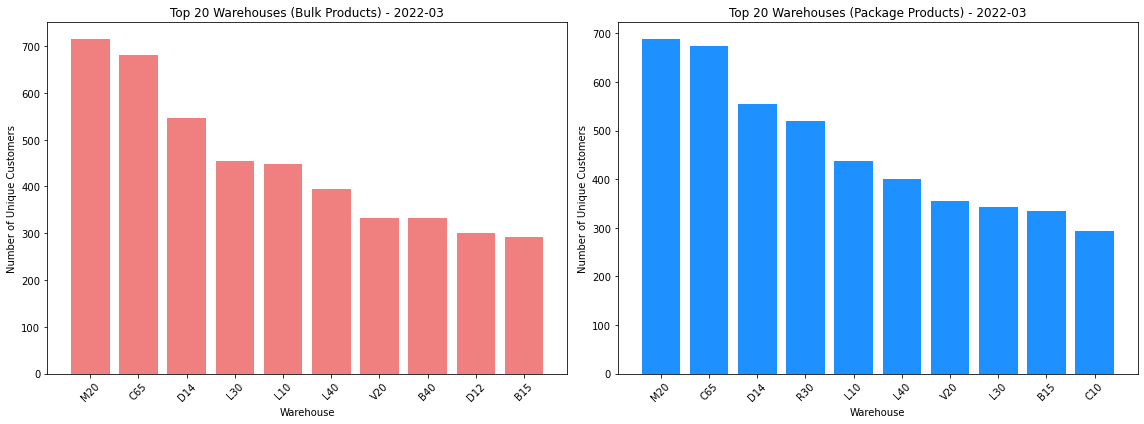

Top 20 warehouses for 2022-04:
    order_date whse product_type  ShipToName2
143    2022-04  C65         BULK          689
175    2022-04  M20         BULK          656
144    2022-04  C65      PACKAGE          648
152    2022-04  D14      PACKAGE          500
151    2022-04  D14         BULK          498
176    2022-04  M20      PACKAGE          462
214    2022-04  R30      PACKAGE          455
169    2022-04  L10         BULK          443
170    2022-04  L10      PACKAGE          425
171    2022-04  L30         BULK          413
174    2022-04  L40      PACKAGE          367
173    2022-04  L40         BULK          326
215    2022-04  V20         BULK          325
122    2022-04  B40         BULK          317
172    2022-04  L30      PACKAGE          309
115    2022-04  B15      PACKAGE          302
133    2022-04  C10      PACKAGE          288
114    2022-04  B15         BULK          286
149    2022-04  D12         BULK          275
216    2022-04  V20      PACKAGE          274


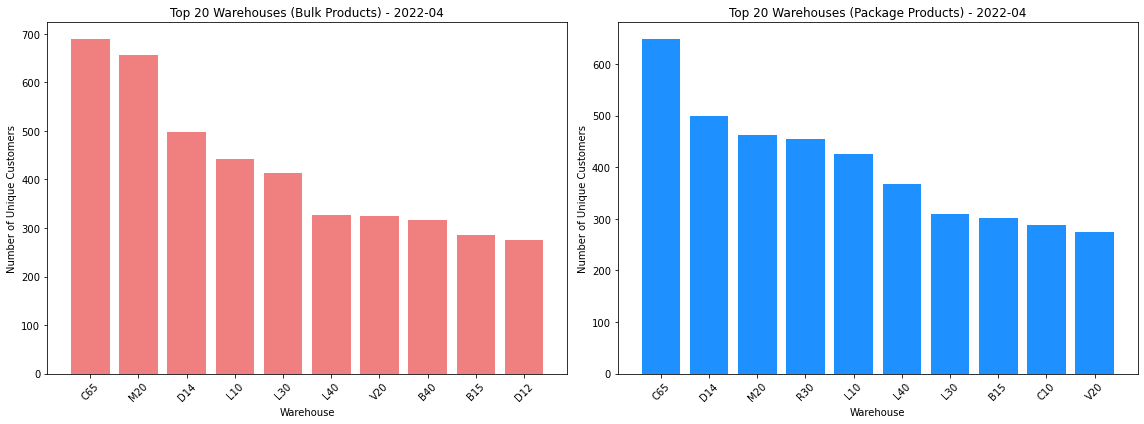

Top 20 warehouses for 2022-05:
    order_date whse product_type  ShipToName2
250    2022-05  C65         BULK          697
326    2022-05  R46         BULK          660
251    2022-05  C65      PACKAGE          654
282    2022-05  M20         BULK          648
328    2022-05  R47         BULK          582
322    2022-05  R44         BULK          559
327    2022-05  R46      PACKAGE          554
258    2022-05  D14         BULK          529
329    2022-05  R47      PACKAGE          529
259    2022-05  D14      PACKAGE          520
323    2022-05  R44      PACKAGE          507
321    2022-05  R30      PACKAGE          495
276    2022-05  L10         BULK          443
324    2022-05  R45         BULK          431
283    2022-05  M20      PACKAGE          428
325    2022-05  R45      PACKAGE          428
277    2022-05  L10      PACKAGE          422
278    2022-05  L30         BULK          422
281    2022-05  L40      PACKAGE          354
280    2022-05  L40         BULK          345


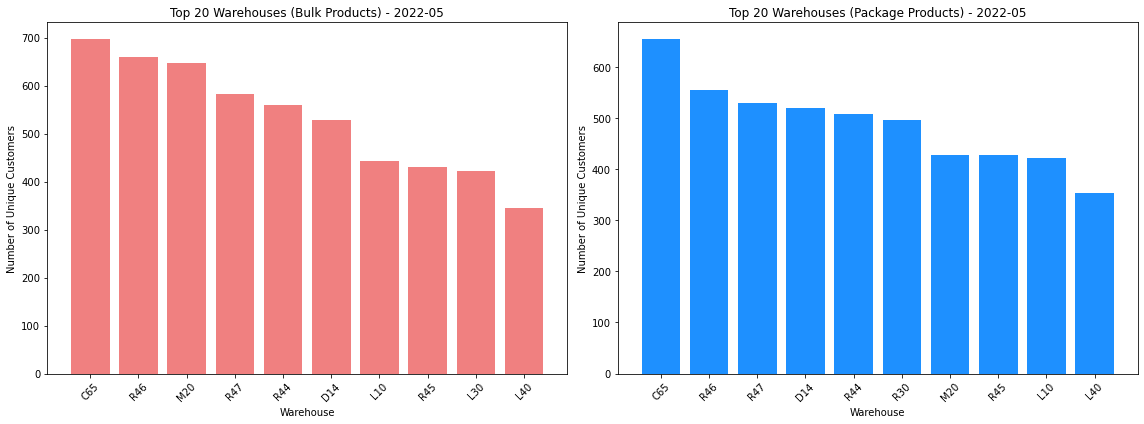

Top 20 warehouses for 2022-06:
    order_date whse product_type  ShipToName2
365    2022-06  C65         BULK          697
399    2022-06  M20         BULK          681
443    2022-06  R46         BULK          678
366    2022-06  C65      PACKAGE          669
439    2022-06  R44         BULK          627
445    2022-06  R47         BULK          619
444    2022-06  R46      PACKAGE          559
446    2022-06  R47      PACKAGE          539
440    2022-06  R44      PACKAGE          522
374    2022-06  D14      PACKAGE          512
373    2022-06  D14         BULK          502
438    2022-06  R30      PACKAGE          477
394    2022-06  L10      PACKAGE          451
441    2022-06  R45         BULK          449
393    2022-06  L10         BULK          438
442    2022-06  R45      PACKAGE          438
400    2022-06  M20      PACKAGE          432
395    2022-06  L30         BULK          407
397    2022-06  L40         BULK          392
336    2022-06  B15         BULK          372


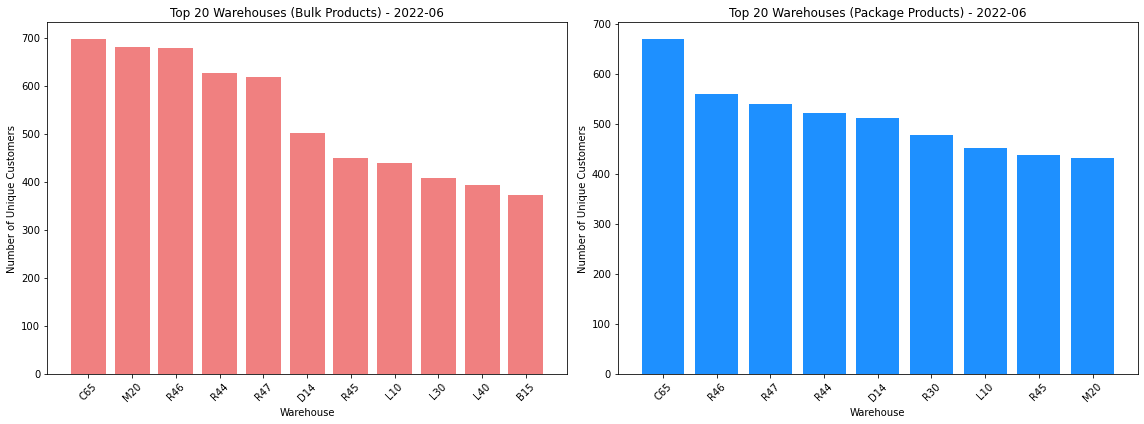

Top 20 warehouses for 2022-07:
    order_date whse product_type  ShipToName2
484    2022-07  C65         BULK          645
519    2022-07  M20         BULK          640
563    2022-07  R46         BULK          636
485    2022-07  C65      PACKAGE          619
565    2022-07  R47         BULK          582
559    2022-07  R44         BULK          539
564    2022-07  R46      PACKAGE          511
492    2022-07  D14         BULK          482
560    2022-07  R44      PACKAGE          474
561    2022-07  R45         BULK          464
493    2022-07  D14      PACKAGE          463
514    2022-07  L10      PACKAGE          421
558    2022-07  R30      PACKAGE          414
513    2022-07  L10         BULK          413
520    2022-07  M20      PACKAGE          409
566    2022-07  R47      PACKAGE          406
562    2022-07  R45      PACKAGE          381
515    2022-07  L30         BULK          379
518    2022-07  L40      PACKAGE          350
517    2022-07  L40         BULK          321


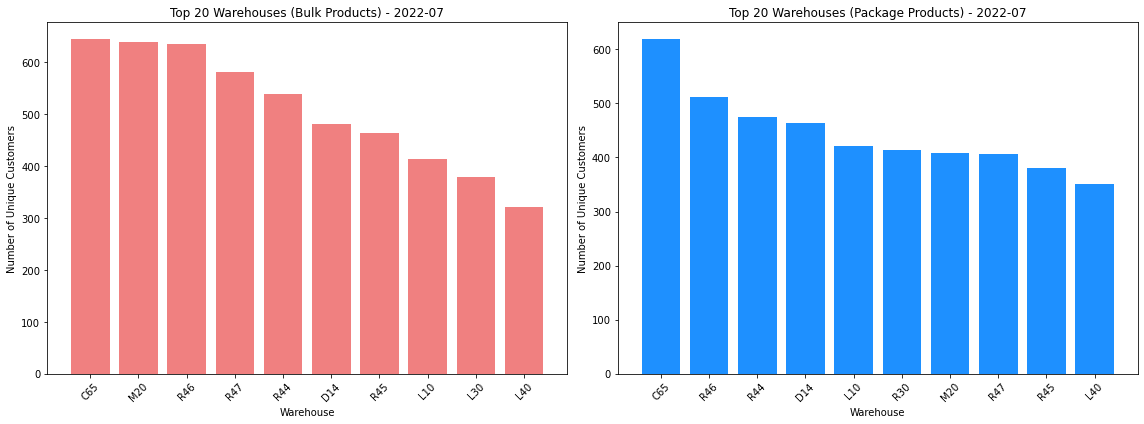

Top 20 warehouses for 2022-08:
    order_date whse product_type  ShipToName2
637    2022-08  M20         BULK          693
604    2022-08  C65         BULK          689
605    2022-08  C65      PACKAGE          653
638    2022-08  M20      PACKAGE          576
613    2022-08  D14      PACKAGE          516
612    2022-08  D14         BULK          478
676    2022-08  R30      PACKAGE          469
631    2022-08  L10         BULK          432
633    2022-08  L30         BULK          413
632    2022-08  L10      PACKAGE          408
636    2022-08  L40      PACKAGE          379
574    2022-08  B15         BULK          366
635    2022-08  L40         BULK          351
582    2022-08  B40         BULK          334
677    2022-08  V20         BULK          334
575    2022-08  B15      PACKAGE          319
610    2022-08  D12         BULK          295
583    2022-08  B40      PACKAGE          285
678    2022-08  V20      PACKAGE          285
675    2022-08  R30         BULK          284


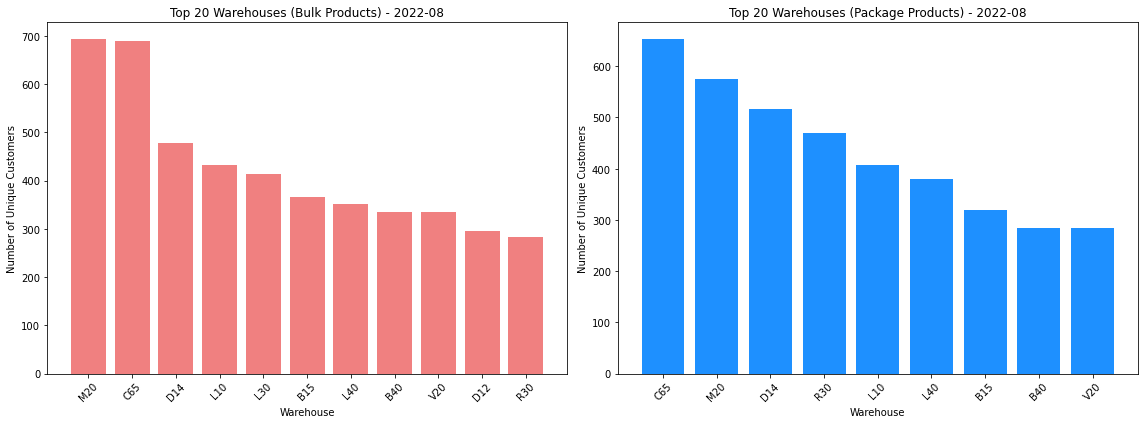

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the data with columns 'order_date', 'ShipToName2', 'whse', and 'product_type'
# Convert 'order_date' column to datetime data type
#df['order_date'] = pd.to_datetime(df['order_date'])

# Group by month, warehouse, and product_type, then count the number of unique customers
monthly_warehouse_product_grouped_1 = df.groupby([df['order_date'].dt.to_period('M'), 'whse', 'product_type'])['ShipToName2'].nunique()

# Convert the multi-level index to columns
monthly_warehouse_product_grouped_1 = monthly_warehouse_product_grouped_1.reset_index()

# Identify unique months in the data
unique_months = monthly_warehouse_product_grouped_1['order_date'].unique()

# Iterate through each unique month and create separate plots for the top 20 warehouses
for month in unique_months:
    # Get the data for the current month
    month_data = monthly_warehouse_product_grouped_1[monthly_warehouse_product_grouped_1['order_date'] == month]

    # Select the top 20 warehouses with the highest number of unique customers for the current month
    top_20_warehouses = month_data.nlargest(20, 'ShipToName2')

    # Print details of the current month's top 20 warehouses
    print(f"Top 20 warehouses for {month}:")
    print(top_20_warehouses)

    # Plot the data using a bar plot with 'lightcoral' color for the top 20 warehouses
    plt.figure(figsize=(16, 6))
    
    # First subplot for bulk products
    ax1 = plt.subplot(121)
    bulk_data = top_20_warehouses[top_20_warehouses['product_type'] == 'BULK']
    x_labels_bulk = [f"{row['whse']}" for _, row in bulk_data.iterrows()]
    bars_bulk = ax1.bar(x_labels_bulk, bulk_data['ShipToName2'], color='lightcoral')
    ax1.set_title(f'Top 20 Warehouses (Bulk Products) - {month}')
    ax1.set_xlabel('Warehouse')
    ax1.set_ylabel('Number of Unique Customers')
    ax1.tick_params(axis='x', rotation=45, labelsize=10)

    # Second subplot for package products
    ax2 = plt.subplot(122)
    package_data = top_20_warehouses[top_20_warehouses['product_type'] == 'PACKAGE']
    x_labels_package = [f"{row['whse']}" for _, row in package_data.iterrows()]
    bars_package = ax2.bar(x_labels_package, package_data['ShipToName2'], color='dodgerblue')
    ax2.set_title(f'Top 20 Warehouses (Package Products) - {month}')
    ax2.set_xlabel('Warehouse')
    ax2.set_ylabel('Number of Unique Customers')
    ax2.tick_params(axis='x', rotation=45, labelsize=10)

    # Add annotations for each bar in both subplots with reduced font size
    for bars, data in [(bars_bulk, bulk_data), (bars_package, package_data)]:
        for bar, value in zip(bars, data['ShipToName2']):
            height = bar.get_height()
            ax.annotate(str(value), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points",ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()


Top 20 warehouses for 2022-03:
    order_date whse product_type  ShipToName2
67     2022-03  M20         BULK          715
68     2022-03  M20      PACKAGE          688
34     2022-03  C65         BULK          681
35     2022-03  C65      PACKAGE          673
43     2022-03  D14      PACKAGE          555
42     2022-03  D14         BULK          547
106    2022-03  R30      PACKAGE          520
63     2022-03  L30         BULK          455
61     2022-03  L10         BULK          449
62     2022-03  L10      PACKAGE          438
66     2022-03  L40      PACKAGE          401
65     2022-03  L40         BULK          395
109    2022-03  V20      PACKAGE          355
64     2022-03  L30      PACKAGE          342
5      2022-03  B15      PACKAGE          334
108    2022-03  V20         BULK          333
12     2022-03  B40         BULK          332
40     2022-03  D12         BULK          300
23     2022-03  C10      PACKAGE          293
4      2022-03  B15         BULK          292
10 

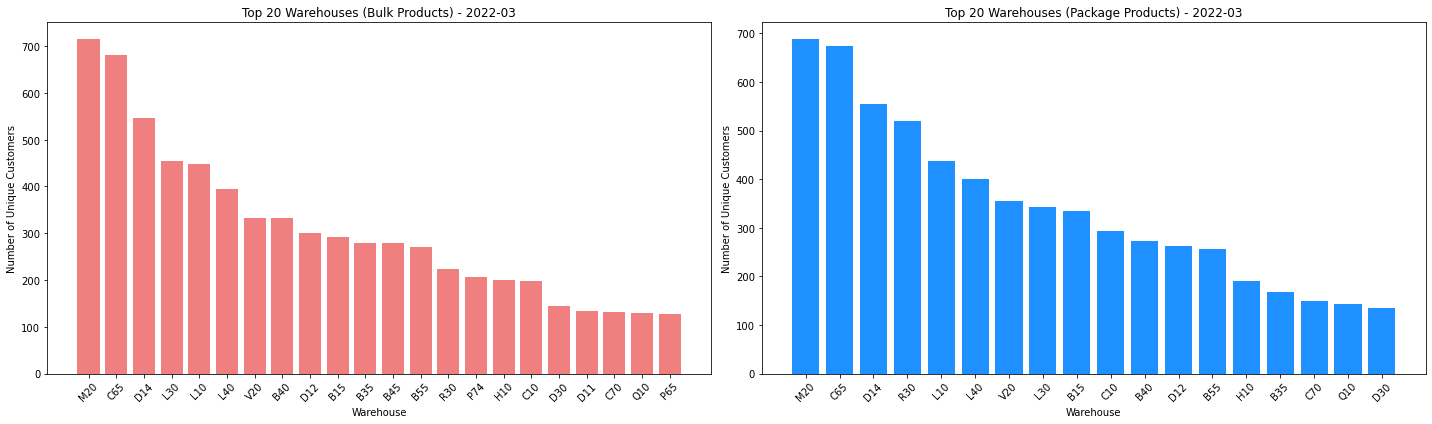

Top 20 warehouses for 2022-04:
    order_date whse product_type  ShipToName2
143    2022-04  C65         BULK          689
175    2022-04  M20         BULK          656
144    2022-04  C65      PACKAGE          648
152    2022-04  D14      PACKAGE          500
151    2022-04  D14         BULK          498
176    2022-04  M20      PACKAGE          462
214    2022-04  R30      PACKAGE          455
169    2022-04  L10         BULK          443
170    2022-04  L10      PACKAGE          425
171    2022-04  L30         BULK          413
174    2022-04  L40      PACKAGE          367
173    2022-04  L40         BULK          326
215    2022-04  V20         BULK          325
122    2022-04  B40         BULK          317
172    2022-04  L30      PACKAGE          309
115    2022-04  B15      PACKAGE          302
133    2022-04  C10      PACKAGE          288
114    2022-04  B15         BULK          286
149    2022-04  D12         BULK          275
216    2022-04  V20      PACKAGE          274
129

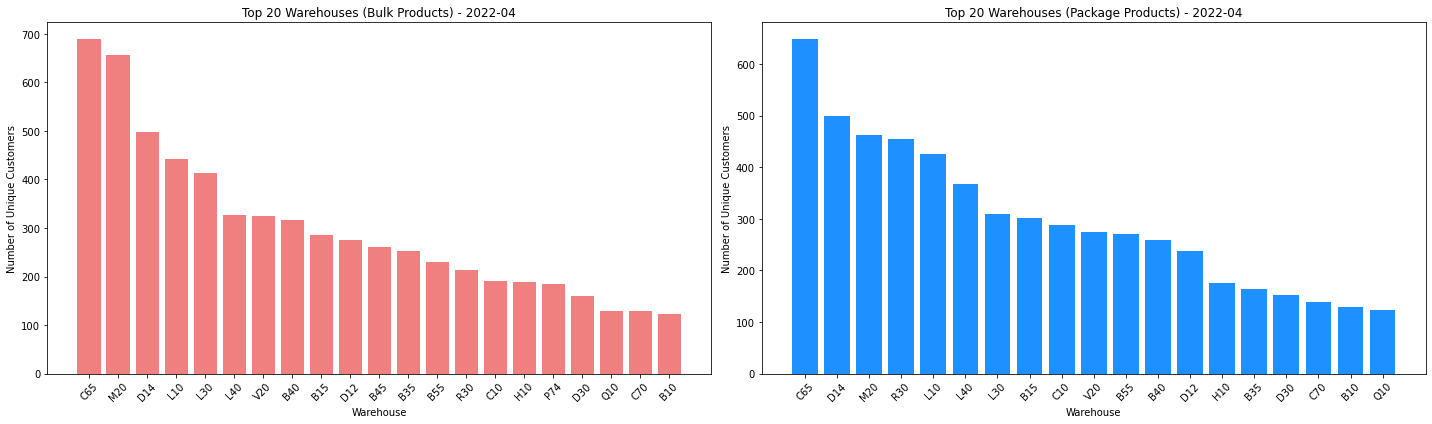

Top 20 warehouses for 2022-05:
    order_date whse product_type  ShipToName2
250    2022-05  C65         BULK          697
326    2022-05  R46         BULK          660
251    2022-05  C65      PACKAGE          654
282    2022-05  M20         BULK          648
328    2022-05  R47         BULK          582
322    2022-05  R44         BULK          559
327    2022-05  R46      PACKAGE          554
258    2022-05  D14         BULK          529
329    2022-05  R47      PACKAGE          529
259    2022-05  D14      PACKAGE          520
323    2022-05  R44      PACKAGE          507
321    2022-05  R30      PACKAGE          495
276    2022-05  L10         BULK          443
324    2022-05  R45         BULK          431
283    2022-05  M20      PACKAGE          428
325    2022-05  R45      PACKAGE          428
277    2022-05  L10      PACKAGE          422
278    2022-05  L30         BULK          422
281    2022-05  L40      PACKAGE          354
280    2022-05  L40         BULK          345
330

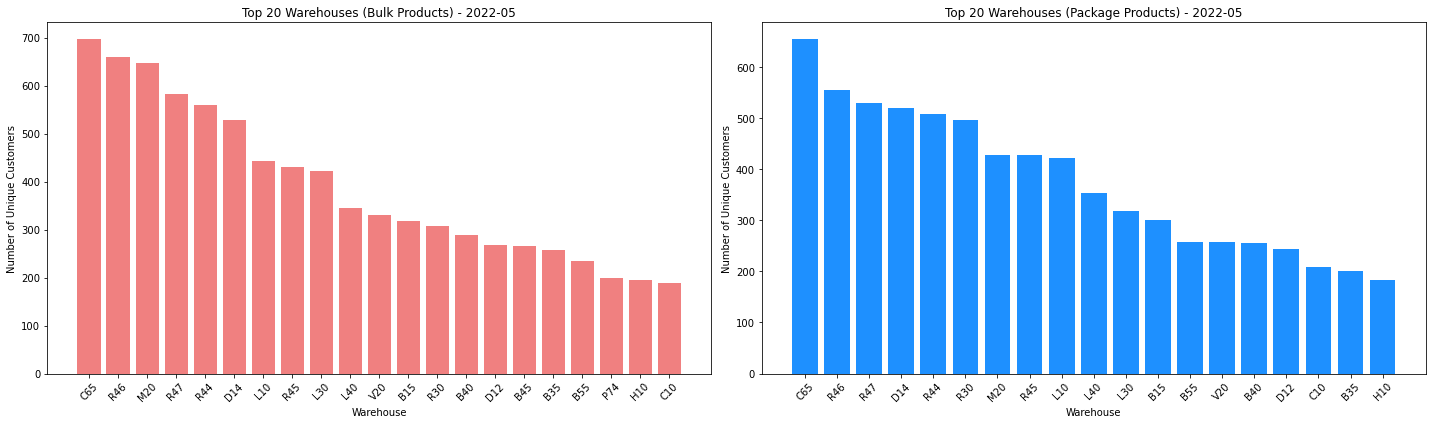

Top 20 warehouses for 2022-06:
    order_date whse product_type  ShipToName2
365    2022-06  C65         BULK          697
399    2022-06  M20         BULK          681
443    2022-06  R46         BULK          678
366    2022-06  C65      PACKAGE          669
439    2022-06  R44         BULK          627
445    2022-06  R47         BULK          619
444    2022-06  R46      PACKAGE          559
446    2022-06  R47      PACKAGE          539
440    2022-06  R44      PACKAGE          522
374    2022-06  D14      PACKAGE          512
373    2022-06  D14         BULK          502
438    2022-06  R30      PACKAGE          477
394    2022-06  L10      PACKAGE          451
441    2022-06  R45         BULK          449
393    2022-06  L10         BULK          438
442    2022-06  R45      PACKAGE          438
400    2022-06  M20      PACKAGE          432
395    2022-06  L30         BULK          407
397    2022-06  L40         BULK          392
336    2022-06  B15         BULK          372
398

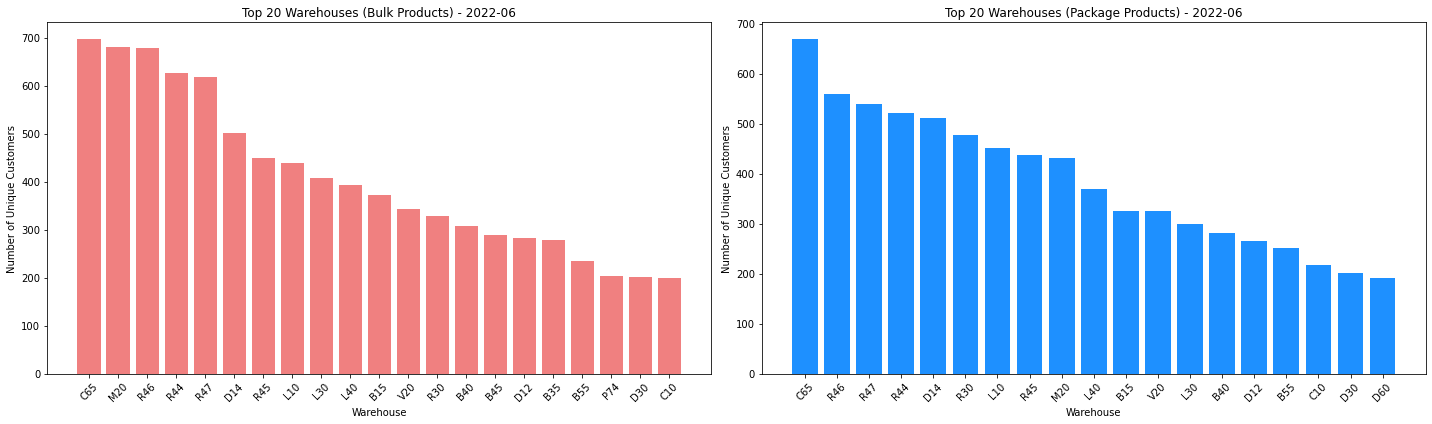

Top 20 warehouses for 2022-07:
    order_date whse product_type  ShipToName2
484    2022-07  C65         BULK          645
519    2022-07  M20         BULK          640
563    2022-07  R46         BULK          636
485    2022-07  C65      PACKAGE          619
565    2022-07  R47         BULK          582
559    2022-07  R44         BULK          539
564    2022-07  R46      PACKAGE          511
492    2022-07  D14         BULK          482
560    2022-07  R44      PACKAGE          474
561    2022-07  R45         BULK          464
493    2022-07  D14      PACKAGE          463
514    2022-07  L10      PACKAGE          421
558    2022-07  R30      PACKAGE          414
513    2022-07  L10         BULK          413
520    2022-07  M20      PACKAGE          409
566    2022-07  R47      PACKAGE          406
562    2022-07  R45      PACKAGE          381
515    2022-07  L30         BULK          379
518    2022-07  L40      PACKAGE          350
517    2022-07  L40         BULK          321
568

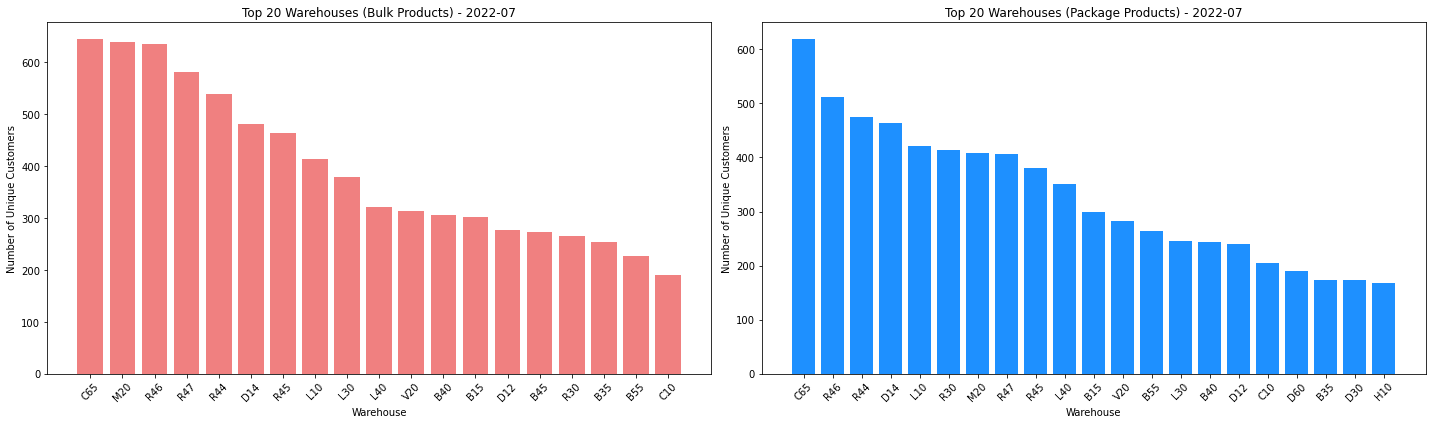

Top 20 warehouses for 2022-08:
    order_date whse product_type  ShipToName2
637    2022-08  M20         BULK          693
604    2022-08  C65         BULK          689
605    2022-08  C65      PACKAGE          653
638    2022-08  M20      PACKAGE          576
613    2022-08  D14      PACKAGE          516
612    2022-08  D14         BULK          478
676    2022-08  R30      PACKAGE          469
631    2022-08  L10         BULK          432
633    2022-08  L30         BULK          413
632    2022-08  L10      PACKAGE          408
636    2022-08  L40      PACKAGE          379
574    2022-08  B15         BULK          366
635    2022-08  L40         BULK          351
582    2022-08  B40         BULK          334
677    2022-08  V20         BULK          334
575    2022-08  B15      PACKAGE          319
610    2022-08  D12         BULK          295
583    2022-08  B40      PACKAGE          285
678    2022-08  V20      PACKAGE          285
675    2022-08  R30         BULK          284
634

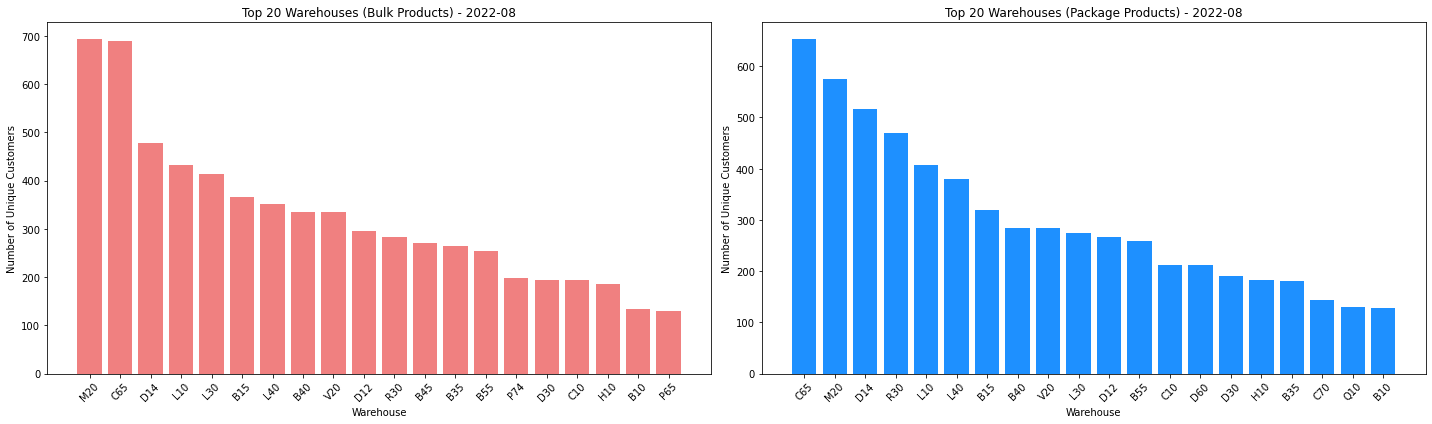

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the data with columns 'order_date', 'ShipToName2', 'whse', and 'product_type'
# Convert 'order_date' column to datetime data type
#df['order_date'] = pd.to_datetime(df['order_date'])

# Group by month, warehouse, and product_type, then count the number of unique customers
monthly_warehouse_product_grouped_1 = df.groupby([df['order_date'].dt.to_period('M'), 'whse', 'product_type'])['ShipToName2'].nunique()

# Convert the multi-level index to columns
monthly_warehouse_product_grouped_1 = monthly_warehouse_product_grouped_1.reset_index()

# Identify unique months in the data
unique_months = monthly_warehouse_product_grouped_1['order_date'].unique()

# Iterate through each unique month and create separate plots for the top 20 warehouses
for month in unique_months:
    # Get the data for the current month
    month_data = monthly_warehouse_product_grouped_1[monthly_warehouse_product_grouped_1['order_date'] == month]

    # Select the top 20 warehouses with the highest number of unique customers for the current month
    top_20_warehouses = month_data.nlargest(40, 'ShipToName2')

    # Print details of the current month's top 20 warehouses
    print(f"Top 20 warehouses for {month}:")
    print(top_20_warehouses)

    # Plot the data using a bar plot with 'lightcoral' color for the top 20 warehouses
    plt.figure(figsize=(20, 6))
    
    # First subplot for bulk products
    ax1 = plt.subplot(121)
    bulk_data = top_20_warehouses[top_20_warehouses['product_type'] == 'BULK']
    x_labels_bulk = [f"{row['whse']}" for _, row in bulk_data.iterrows()]
    bars_bulk = ax1.bar(x_labels_bulk, bulk_data['ShipToName2'], color='lightcoral')
    ax1.set_title(f'Top 20 Warehouses (Bulk Products) - {month}')
    ax1.set_xlabel('Warehouse')
    ax1.set_ylabel('Number of Unique Customers')
    ax1.tick_params(axis='x', rotation=45, labelsize=10)
    ax1.set_xticks(range(len(x_labels_bulk)))  # Set explicit x-ticks
    ax1.set_xticklabels(x_labels_bulk)  # Set x-tick labels

    # Second subplot for package products
    ax2 = plt.subplot(122)
    package_data = top_20_warehouses[top_20_warehouses['product_type'] == 'PACKAGE']
    x_labels_package = [f"{row['whse']}" for _, row in package_data.iterrows()]
    bars_package = ax2.bar(x_labels_package, package_data['ShipToName2'], color='dodgerblue')
    ax2.set_title(f'Top 20 Warehouses (Package Products) - {month}')
    ax2.set_xlabel('Warehouse')
    ax2.set_ylabel('Number of Unique Customers')
    ax2.tick_params(axis='x', rotation=45, labelsize=10)
    ax2.set_xticks(range(len(x_labels_package)))  # Set explicit x-ticks
    ax2.set_xticklabels(x_labels_package)  # Set x-tick labels

    # Add annotations for each bar in both subplots with reduced font size
    for bars, data in [(bars_bulk, bulk_data), (bars_package, package_data)]:
        for bar, value in zip(bars, data['ShipToName2']):
            height = bar.get_height()
           # ax1.annotate(str(value), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
            #        textcoords="offset points",ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()


In [67]:
df['order_date'] = pd.to_datetime(df['order_date'])

# Calculate the number of unique truck IDs during the past 6 months
unique_truck_ids_total = df['truck_id'].nunique()
print(f"Number of unique truck IDs during the past 6 months: {unique_truck_ids_total}")

# Group by month and calculate the number of truck IDs for each month
monthly_truck_ids = df.groupby(df['order_date'].dt.to_period('M'))['truck_id'].nunique()
print("Number of truck IDs for each month:")
print(monthly_truck_ids)

Number of unique truck IDs during the past 6 months: 1132
Number of truck IDs for each month:
order_date
2022-03    704
2022-04    709
2022-05    854
2022-06    951
2022-07    900
2022-08    788
Freq: M, Name: truck_id, dtype: int64


In [68]:
top_100_truck_ids = df['truck_id'].value_counts().nlargest(100)
print("Top 100 frequently used truck IDs:")
print(top_100_truck_ids)

Top 100 frequently used truck IDs:
165046A    7561
165048A    7291
125188A    7000
084309A    6517
166008A    6368
           ... 
119094A    1412
166571A    1397
184273A    1378
202787A    1371
150193A    1363
Name: truck_id, Length: 100, dtype: int64


In [69]:
import pandas as pd

# Assuming df is the DataFrame containing the data with columns 'order_date', 'ShipToName2', 'whse', 'product_type', and 'truck_id'
# Convert 'order_date' column to datetime data type
df['order_date'] = pd.to_datetime(df['order_date'])

# Group by month and truck_id, then count the occurrences of each truck_id in each month
monthly_truck_counts = df.groupby([df['order_date'].dt.to_period('M'), 'truck_id'])['truck_id'].count()

# Loop through each unique month and print the top 10 trucks used in that month
for month in df['order_date'].dt.to_period('M').unique():
    print(f"Top 10 trucks used in {month}:")
    monthly_truck_counts_month = monthly_truck_counts[month].nlargest(10)
    print(monthly_truck_counts_month)
    print()

Top 10 trucks used in 2022-07:
truck_id
166008A    1258
165046A    1189
197949A    1166
183047A    1110
125188A    1108
165048A    1071
084309A     909
154446A     892
073466A     891
142833A     845
Name: truck_id, dtype: int64

Top 10 trucks used in 2022-04:
truck_id
165046A    1330
166007A    1231
154446A    1212
165048A    1174
183047A    1148
152271A    1118
125188A    1084
154447A    1069
084309A    1054
186945A    1042
Name: truck_id, dtype: int64

Top 10 trucks used in 2022-03:
truck_id
084309A    1546
165046A    1380
183047A    1369
111672A    1309
125188A    1287
165048A    1287
138187A    1152
166007A    1106
118934A    1093
215951A    1090
Name: truck_id, dtype: int64

Top 10 trucks used in 2022-05:
truck_id
166008A    1318
165048A    1279
166211A    1147
125188A    1141
165046A    1095
084309A    1076
149573A    1059
138093A     986
186945A     972
197949A     966
Name: truck_id, dtype: int64

Top 10 trucks used in 2022-06:
truck_id
165048A    1272
165046A    1228
180096A 

In [74]:
import pandas as pd

# Assuming df is the DataFrame containing the data with columns 'order_date', 'ShipToName2', 'whse', 'product_type', and 'truck_id'
# Convert 'order_date' column to datetime data type
#df['order_date'] = pd.to_datetime(df['order_date'])

# Get the unique months in the data
unique_months = sorted(df['order_date'].dt.to_period('M').unique())

# Loop through each unique month and print the number of unique customers for that month
for month in unique_months:
    month_data = df[df['order_date'].dt.to_period('M') == month]
    unique_customers_month = month_data['ShipToName2'].nunique()
    unique_trucks_month = month_data['truck_id'].nunique()
    print(f"Number of unique customers during {month}: {unique_customers_month}")
    print(f"Number of different trucks used during {month}: {unique_trucks_month}")
    print()

Number of unique customers during 2022-03: 12454
Number of different trucks used during 2022-03: 704

Number of unique customers during 2022-04: 11618
Number of different trucks used during 2022-04: 709

Number of unique customers during 2022-05: 14925
Number of different trucks used during 2022-05: 854

Number of unique customers during 2022-06: 15803
Number of different trucks used during 2022-06: 951

Number of unique customers during 2022-07: 14653
Number of different trucks used during 2022-07: 900

Number of unique customers during 2022-08: 12167
Number of different trucks used during 2022-08: 788



Highest number of orders completed by a truck ID during 2022-03: 1546
Highest number of orders completed by a truck ID during 2022-04: 1330
Highest number of orders completed by a truck ID during 2022-05: 1318
Highest number of orders completed by a truck ID during 2022-06: 1272
Highest number of orders completed by a truck ID during 2022-07: 1258
Highest number of orders completed by a truck ID during 2022-08: 1339
Least number of orders completed by a truck ID during 2022-03: 1
Least number of orders completed by a truck ID during 2022-04: 1
Least number of orders completed by a truck ID during 2022-05: 1
Least number of orders completed by a truck ID during 2022-06: 1
Least number of orders completed by a truck ID during 2022-07: 1
Least number of orders completed by a truck ID during 2022-08: 1


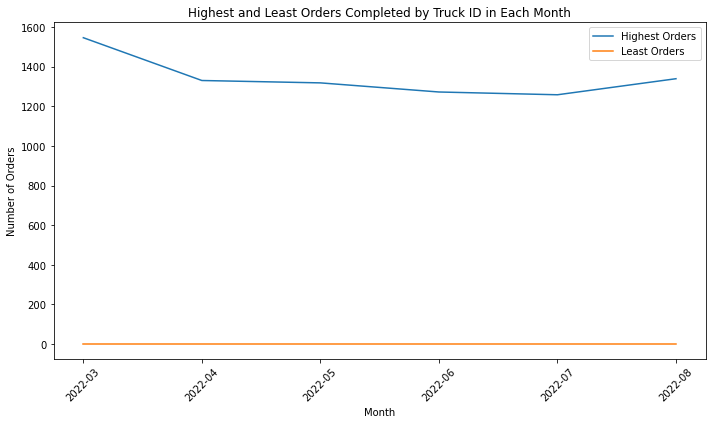

In [78]:
import pandas as pd

# Assuming df is the DataFrame containing the data with columns 'order_date', 'ShipToName2', 'whse', 'product_type', and 'truck_id'
# Convert 'order_date' column to datetime data type
df['order_date'] = pd.to_datetime(df['order_date'])

# Group by month and truck_id, then count the number of orders for each truck_id in each month
monthly_truck_order_counts = df.groupby([df['order_date'].dt.to_period('M'), 'truck_id'])['ShipToName2'].count()

# Find the highest number of orders completed by a truck ID during each month
max_orders_per_truck_per_month = monthly_truck_order_counts.groupby(level=0).max()

# Print the results for each month
for month, max_orders in max_orders_per_truck_per_month.items():
    print(f"Highest number of orders completed by a truck ID during {month}: {max_orders}")

min_orders_per_truck_per_month = monthly_truck_order_counts.groupby(level=0).min()

# Print the results for each month
for month, min_orders in min_orders_per_truck_per_month.items():
    print(f"Least number of orders completed by a truck ID during {month}: {min_orders}")
    
max_orders_per_truck_per_month.index = max_orders_per_truck_per_month.index.astype(str)
min_orders_per_truck_per_month.index = min_orders_per_truck_per_month.index.astype(str)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_orders_per_truck_per_month.index, max_orders_per_truck_per_month.values, label='Highest Orders')
plt.plot(min_orders_per_truck_per_month.index, min_orders_per_truck_per_month.values, label='Least Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Highest and Least Orders Completed by Truck a ID in Each Month')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 warehouses for 2022-03:
   order_date whse  gallons_shipped
17    2022-03  C65    806889.925000
34    2022-03  M20    554108.368000
31    2022-03  L10    472150.286250
32    2022-03  L30    425037.352500
33    2022-03  L40    354208.796250
2     2022-03  B15    343007.642500
21    2022-03  D14    342145.588750
6     2022-03  B40    341916.885000
53    2022-03  R30    275477.312500
55    2022-03  V20    237319.069875
20    2022-03  D12    226857.625000
5     2022-03  B35    217553.218750
7     2022-03  B45    197486.000000
11    2022-03  C10    181980.332000
9     2022-03  B55    177128.968750
28    2022-03  H10    176044.043750
18    2022-03  C70    175567.425000
41    2022-03  P86    143942.817500
40    2022-03  P74    136726.468750
47    2022-03  Q10    103712.632500


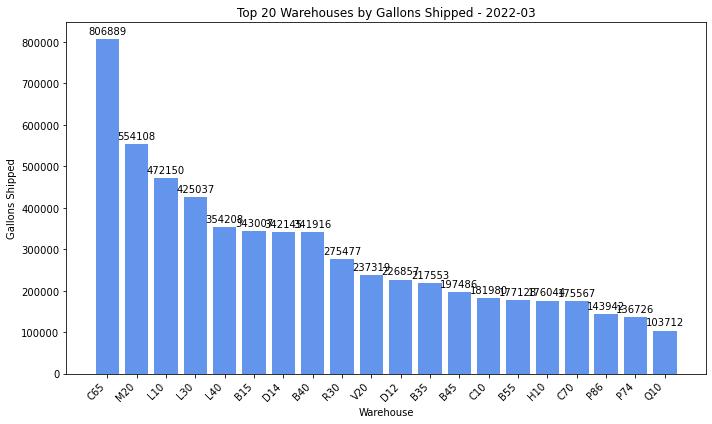

Top 10 warehouses for 2022-04:
    order_date whse  gallons_shipped
73     2022-04  C65    741874.006250
90     2022-04  M20    474783.152250
87     2022-04  L10    437607.842500
88     2022-04  L30    395722.977500
58     2022-04  B15    321217.018750
62     2022-04  B40    306016.421250
77     2022-04  D14    305250.818750
89     2022-04  L40    287169.706250
109    2022-04  R30    228525.093750
61     2022-04  B35    201353.900000
110    2022-04  V20    196699.081250
76     2022-04  D12    168504.706250
67     2022-04  C10    164977.027875
65     2022-04  B55    162276.793750
63     2022-04  B45    159084.000000
84     2022-04  H10    158543.687500
74     2022-04  C70    145015.181250
96     2022-04  P74    134751.631250
97     2022-04  P86    128454.605000
103    2022-04  Q10    100728.081250


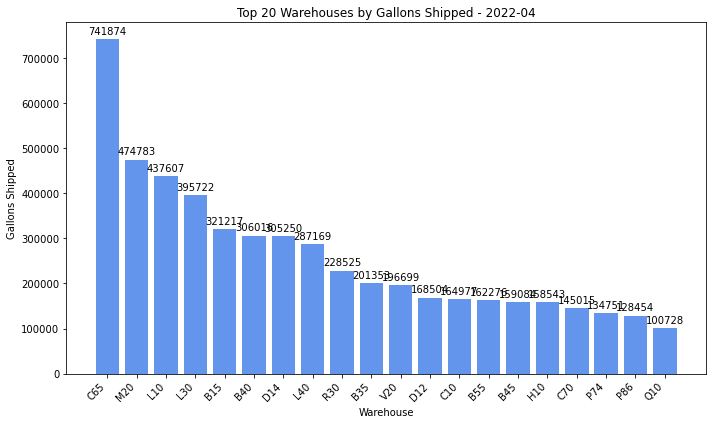

Top 10 warehouses for 2022-05:
    order_date whse  gallons_shipped
128    2022-05  C65     740797.53125
165    2022-05  R44     487048.56700
145    2022-05  M20     471111.31375
167    2022-05  R46     470183.53000
168    2022-05  R47     431995.47900
142    2022-05  L10     426147.00350
143    2022-05  L30     396111.61250
113    2022-05  B15     349754.50625
132    2022-05  D14     338659.44750
166    2022-05  R45     332676.97300
117    2022-05  B40     322144.92125
144    2022-05  L40     309818.78375
164    2022-05  R30     284627.93750
116    2022-05  B35     231031.90000
169    2022-05  V20     206990.24000
139    2022-05  H10     192027.11250
131    2022-05  D12     179422.76875
118    2022-05  B45     171439.00000
120    2022-05  B55     168921.15625
152    2022-05  P86     156443.08500


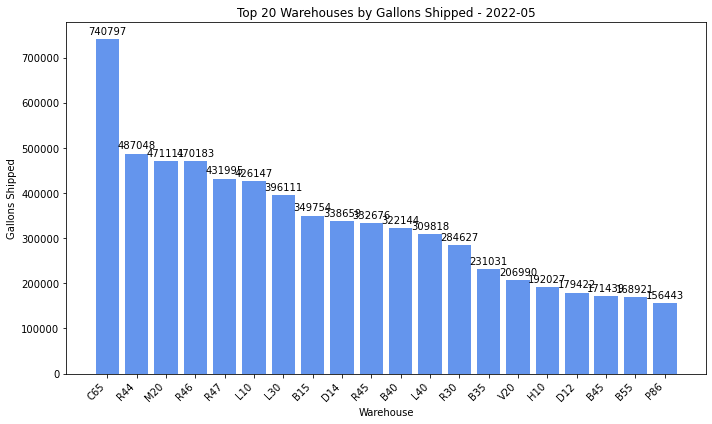

Top 10 warehouses for 2022-06:
    order_date whse  gallons_shipped
187    2022-06  C65     796719.18750
225    2022-06  R44     505150.97400
205    2022-06  M20     496991.62375
227    2022-06  R46     479235.78000
228    2022-06  R47     467948.13700
202    2022-06  L10     426866.84250
172    2022-06  B15     389977.75000
226    2022-06  R45     377454.73700
203    2022-06  L30     357782.48125
191    2022-06  D14     333144.08125
176    2022-06  B40     331793.07000
204    2022-06  L40     330185.47875
224    2022-06  R30     308308.87500
175    2022-06  B35     231382.96250
230    2022-06  V20     221886.13750
179    2022-06  B55     192515.02500
190    2022-06  D12     192402.20000
181    2022-06  C10     170835.12500
199    2022-06  H10     169740.54375
177    2022-06  B45     169739.00000


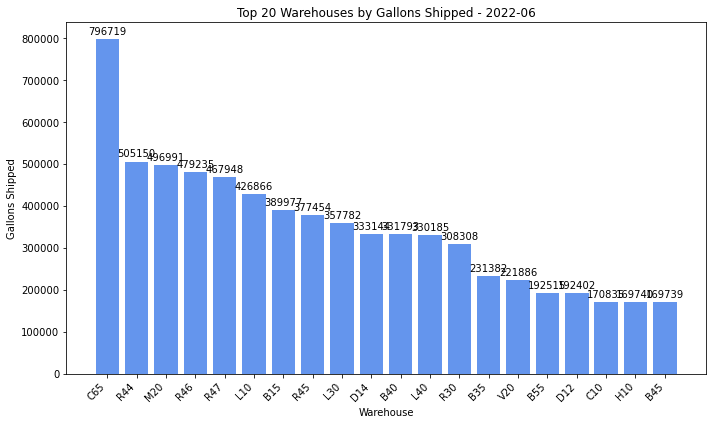

Top 10 warehouses for 2022-07:
    order_date whse  gallons_shipped
248    2022-07  C65    632586.656250
266    2022-07  M20    450948.009125
286    2022-07  R44    450178.777000
288    2022-07  R46    429566.657000
289    2022-07  R47    386244.656000
263    2022-07  L10    368094.467500
233    2022-07  B15    342918.736250
287    2022-07  R45    339814.891000
264    2022-07  L30    324556.112500
237    2022-07  B40    307384.870000
252    2022-07  D14    290567.731250
265    2022-07  L40    274414.383750
285    2022-07  R30    223414.885000
236    2022-07  B35    214537.575000
291    2022-07  V20    193653.566250
238    2022-07  B45    177118.000000
251    2022-07  D12    166524.581250
240    2022-07  B55    165815.660000
242    2022-07  C10    152140.106625
273    2022-07  P86    137984.000000


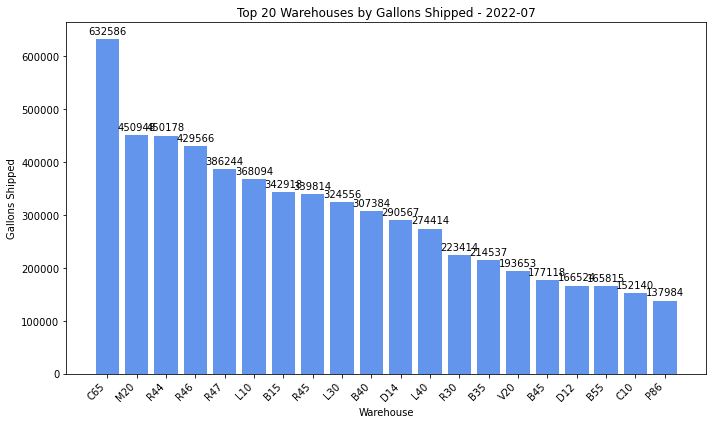

Top 10 warehouses for 2022-08:
    order_date whse  gallons_shipped
309    2022-08  C65    773721.187500
326    2022-08  M20    540261.558750
323    2022-08  L10    448260.740000
294    2022-08  B15    363047.968750
324    2022-08  L30    352908.931250
298    2022-08  B40    326416.037500
313    2022-08  D14    321093.723750
325    2022-08  L40    310060.206250
345    2022-08  R30    261298.062500
297    2022-08  B35    221551.537500
346    2022-08  V20    220682.252500
312    2022-08  D12    191739.456250
299    2022-08  B45    187897.000000
303    2022-08  C10    175867.894875
301    2022-08  B55    172599.800000
320    2022-08  H10    164753.600000
333    2022-08  P86    149506.412500
310    2022-08  C70    146050.875000
332    2022-08  P74    140185.437500
293    2022-08  B10    114723.372500


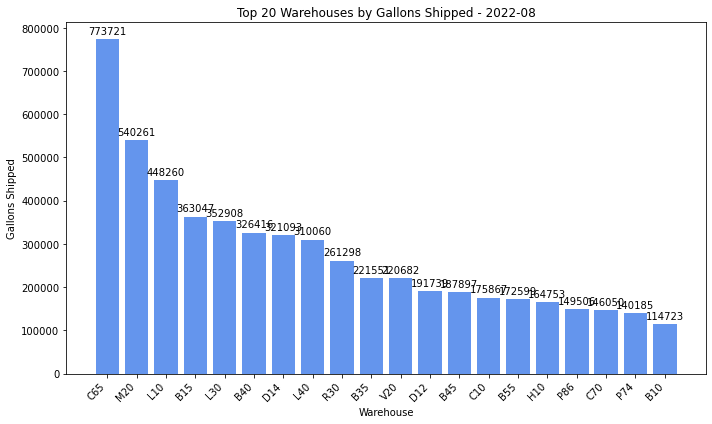

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the data with columns 'order_date', 'whse', 'gallons_shipped'
# Convert 'order_date' column to datetime data type
#df['order_date'] = pd.to_datetime(df['order_date'])

# Group by month and warehouse, then sum the number of gallons shipped for each warehouse in each month
monthly_warehouse_gallons_shipped = df.groupby([df['order_date'].dt.to_period('M'), 'whse'])['gallons_shipped'].sum().reset_index()

# Identify unique months in the data
unique_months = monthly_warehouse_gallons_shipped['order_date'].unique()

# Iterate through each unique month and create separate plots for the top 10 warehouses by gallons shipped
for month in unique_months:
    # Get the data for the current month
    month_data = monthly_warehouse_gallons_shipped[monthly_warehouse_gallons_shipped['order_date'] == month]

    # Select the top 10 warehouses with the highest number of gallons shipped for the current month
    top_10_warehouses = month_data.nlargest(20, 'gallons_shipped')

    # Print details of the current month's top 10 warehouses
    print(f"Top 10 warehouses for {month}:")
    print(top_10_warehouses)

    # Plot the data using a bar plot with 'cornflowerblue' color for the top 10 warehouses
    plt.figure(figsize=(10, 6))
    
    x_labels = [f"{row['whse']}" for _, row in top_10_warehouses.iterrows()]
    bars = plt.bar(x_labels, top_10_warehouses['gallons_shipped'], color='cornflowerblue')
    plt.title(f'Top 20 Warehouses by Gallons Shipped - {month}')
    plt.xlabel('Warehouse')
    plt.ylabel('Gallons Shipped')
    plt.xticks(rotation=45, ha='right')
    
    # Add annotations for each bar with the number of gallons shipped
    for bar, value in zip(bars, top_10_warehouses['gallons_shipped']):
        height = bar.get_height()
        plt.annotate(str(int(value)), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()



In [101]:
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is the DataFrame containing the data with columns 'order_date', 'whse', 'product_type', and 'gallons_shipped'
# Convert 'order_date' column to datetime data type
# df['order_date'] = pd.to_datetime(df['order_date'])

# Group by warehouse and product_type, then sum the number of gallons shipped for each warehouse
warehouse_product_gallons_shipped = df.groupby(['whse', 'product_type'])['gallons_shipped'].sum().reset_index()

# Find the top 10 warehouses based on the total gallons shipped (combined bulk and package values)
top_10_warehouses = warehouse_product_gallons_shipped.groupby('whse').sum().nlargest(10, 'gallons_shipped').index

# Filter the data to include only the top 10 warehouses
top_10_data = warehouse_product_gallons_shipped[warehouse_product_gallons_shipped['whse'].isin(top_10_warehouses)]

# Create the bar plot with two small bars (bulk and package) side by side for each warehouse
plt.figure(figsize=(12, 6))

# Get the unique warehouses for the x-axis
warehouses = np.sort(top_10_data['whse'].unique())
x_labels = [f"{whse}" for whse in warehouses]

# Calculate the bar width for each warehouse to position the bars side by side
bar_width = 0.35

# Create the bar plot for bulk products
bulk_data = top_10_data[top_10_data['product_type'] == 'BULK']
bulk_bars = plt.bar(np.arange(len(warehouses)), bulk_data['gallons_shipped'], width=bar_width, color='lightcoral', label='Bulk Products')

# Create the bar plot for package products
package_data = top_10_data[top_10_data['product_type'] == 'PACKAGE']
package_bars = plt.bar(np.arange(len(warehouses)) + bar_width, package_data['gallons_shipped'], width=bar_width, color='dodgerblue', label='Package Products')

plt.title('Top 10 Warehouses by Total Gallons Shipped over total time duration')
plt.xlabel('Warehouse')
plt.ylabel('Gallons Shipped')
plt.xticks(np.arange(len(warehouses)) + bar_width / 2, x_labels, rotation=45, ha='right')
plt.legend()

# Add annotations for each bar with the number of gallons shipped for both product types
for bars, data in [(bulk_bars, bulk_data), (package_bars, package_data)]:
    for bar, value in zip(bars, data['gallons_shipped']):
        height = bar.get_height()
        plt.annotate(str(int(value)), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()
'''

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Assuming df is the DataFrame containing the data with columns \'order_date\', \'whse\', \'product_type\', and \'gallons_shipped\'\n# Convert \'order_date\' column to datetime data type\n# df[\'order_date\'] = pd.to_datetime(df[\'order_date\'])\n\n# Group by warehouse and product_type, then sum the number of gallons shipped for each warehouse\nwarehouse_product_gallons_shipped = df.groupby([\'whse\', \'product_type\'])[\'gallons_shipped\'].sum().reset_index()\n\n# Find the top 10 warehouses based on the total gallons shipped (combined bulk and package values)\ntop_10_warehouses = warehouse_product_gallons_shipped.groupby(\'whse\').sum().nlargest(10, \'gallons_shipped\').index\n\n# Filter the data to include only the top 10 warehouses\ntop_10_data = warehouse_product_gallons_shipped[warehouse_product_gallons_shipped[\'whse\'].isin(top_10_warehouses)]\n\n# Create the bar plot with two small bars (bulk and pac

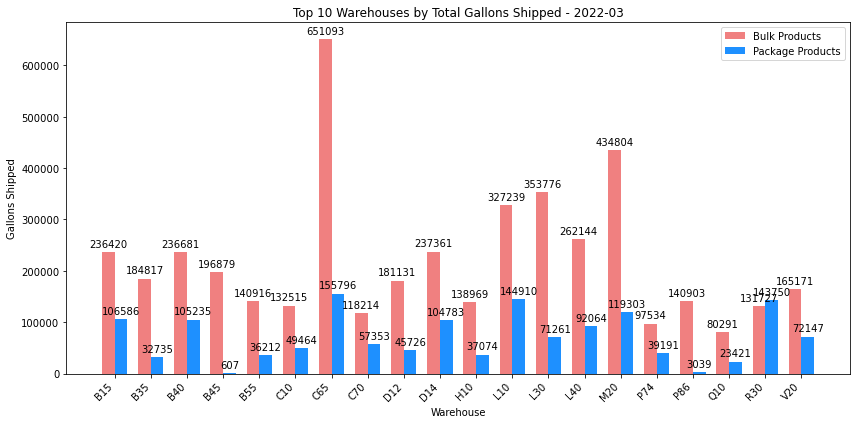

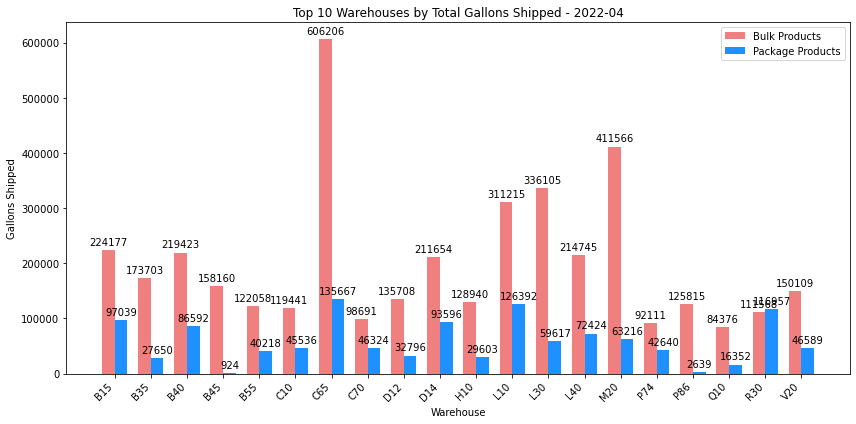

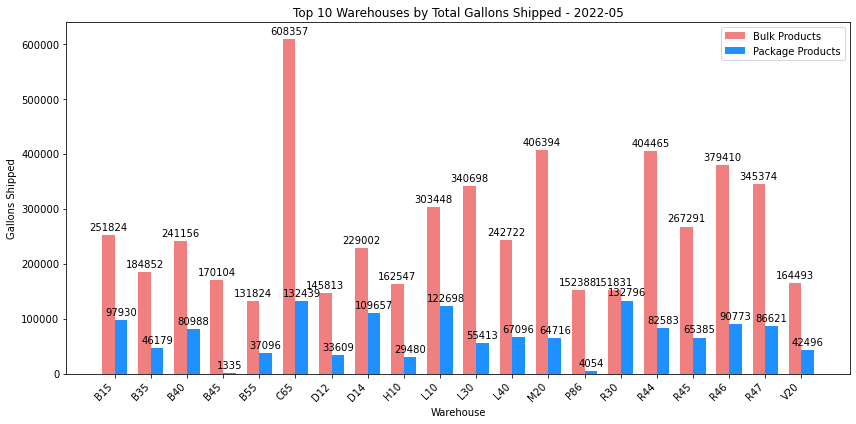

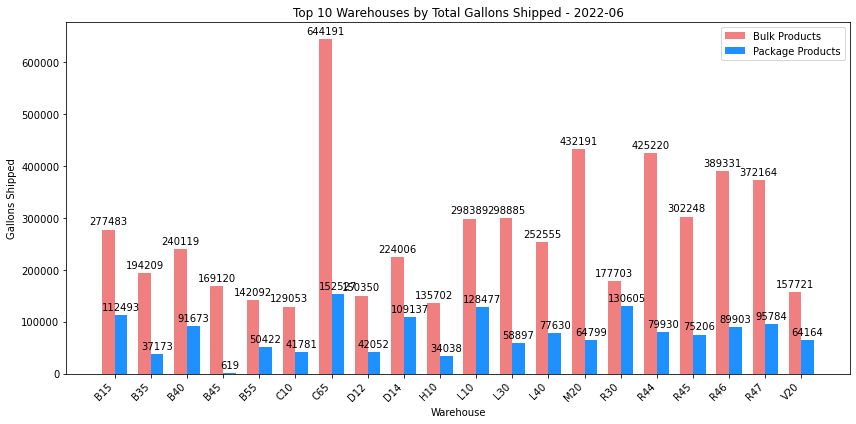

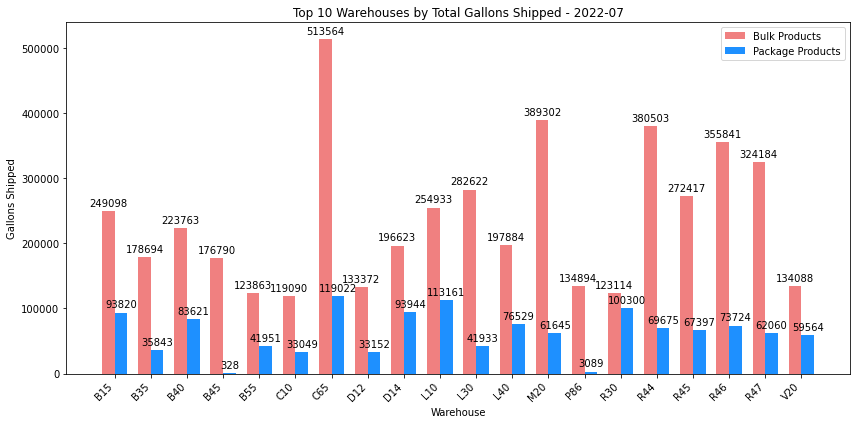

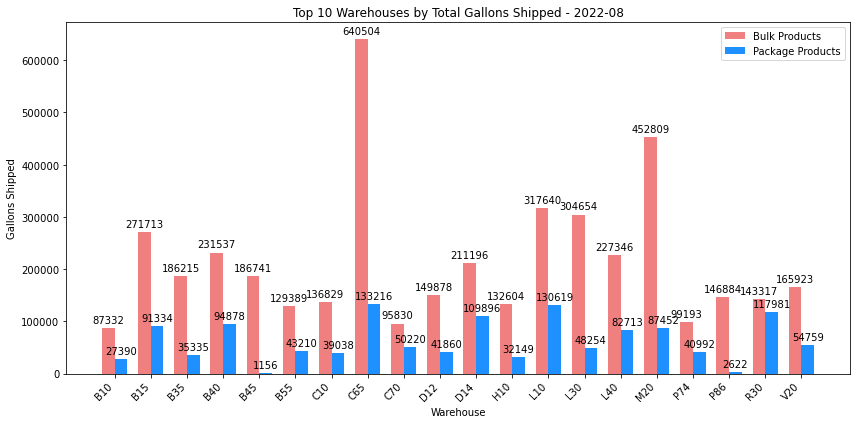

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is the DataFrame containing the data with columns 'order_date', 'whse', 'product_type', and 'gallons_shipped'
# Convert 'order_date' column to datetime data type
# df['order_date'] = pd.to_datetime(df['order_date'])

# Group by month, warehouse, and product_type, then sum the number of gallons shipped for each warehouse
monthly_warehouse_product_gallons_shipped = df.groupby([df['order_date'].dt.to_period('M'), 'whse', 'product_type'])['gallons_shipped'].sum().reset_index()

# Identify unique months in the data
unique_months = monthly_warehouse_product_gallons_shipped['order_date'].unique()

# Loop through each unique month and create separate plots
for month in unique_months:
    # Filter the data for the current month
    month_data = monthly_warehouse_product_gallons_shipped[monthly_warehouse_product_gallons_shipped['order_date'] == month]
    
    # Find the top 10 warehouses based on the total gallons shipped (combined bulk and package values) for the current month
    top_10_warehouses = month_data.groupby('whse').sum().nlargest(20, 'gallons_shipped').index
    
    # Filter the data to include only the rows corresponding to the top 10 warehouses for the current month
    top_10_data = month_data[month_data['whse'].isin(top_10_warehouses)]

    # Create the bar plot with two small bars (bulk and package) side by side for each warehouse for the current month
    plt.figure(figsize=(12, 6))

    # Get the unique warehouses for the x-axis
    warehouses = np.sort(top_10_data['whse'].unique())
    x_labels = [f"{whse}" for whse in warehouses]

    # Calculate the bar width for each warehouse to position the bars side by side
    bar_width = 0.35

    # Create the bar plot for bulk products
    bulk_data = top_10_data[top_10_data['product_type'] == 'BULK']
    bulk_bars = plt.bar(np.arange(len(warehouses)), bulk_data['gallons_shipped'], width=bar_width, color='lightcoral', label='Bulk Products')

    # Create the bar plot for package products
    package_data = top_10_data[top_10_data['product_type'] == 'PACKAGE']
    package_bars = plt.bar(np.arange(len(warehouses)) + bar_width, package_data['gallons_shipped'], width=bar_width, color='dodgerblue', label='Package Products')

    plt.title(f'Top 20 Warehouses by Total Gallons Shipped - {month}')
    plt.xlabel('Warehouse')
    plt.ylabel('Gallons Shipped')
    plt.xticks(np.arange(len(warehouses)) + bar_width / 2, x_labels, rotation=45, ha='right')
    plt.legend()

    # Add annotations for each bar with the number of gallons shipped for both product types
    for bars, data in [(bulk_bars, bulk_data), (package_bars, package_data)]:
        for bar, value in zip(bars, data['gallons_shipped']):
            height = bar.get_height()
            plt.annotate(str(int(value)), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                         textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
